In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Informations sur le dataset
print("Dimensions du dataset:", df.shape)
df.info()

Dimensions du dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Statistiques descriptives
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

# Vérification des valeurs nulles (qui sont réellement des données manquantes)
print("\nNombre de valeurs à zéro (potentiellement manquantes) par colonne:")
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"{column}: {(df[column] == 0).sum()} valeurs à zéro")

Nombre de valeurs manquantes par colonne:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Nombre de valeurs à zéro (potentiellement manquantes) par colonne:
Glucose: 5 valeurs à zéro
BloodPressure: 35 valeurs à zéro
SkinThickness: 227 valeurs à zéro
Insulin: 374 valeurs à zéro
BMI: 11 valeurs à zéro


Distribution de la variable cible:
Outcome
0    500
1    268
Name: count, dtype: int64
Pourcentage:
Outcome
0    65.1
1    34.9
Name: proportion, dtype: float64


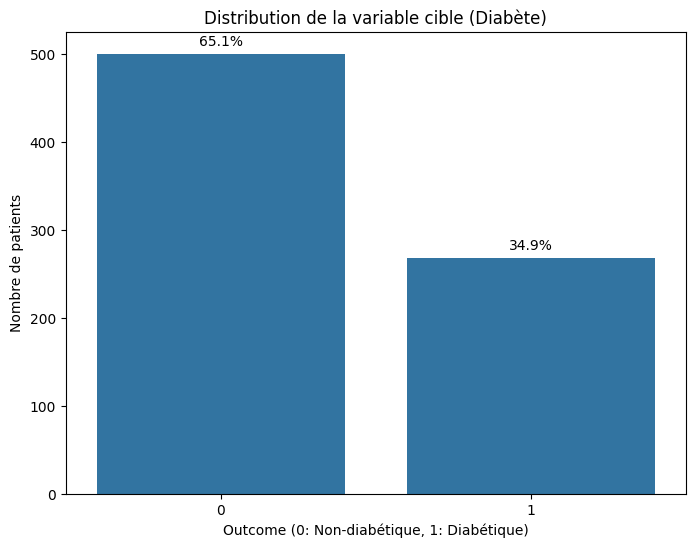

In [12]:
# Distribution de la variable cible
print("Distribution de la variable cible:")
print(df['Outcome'].value_counts())
print("Pourcentage:")
print(df['Outcome'].value_counts(normalize=True).round(3) * 100)

# Visualisation
plt.figure(figsize=(8, 6))
target_counts = df['Outcome'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution de la variable cible (Diabète)')
plt.xlabel('Outcome (0: Non-diabétique, 1: Diabétique)')
plt.ylabel('Nombre de patients')

# Ajouter des pourcentages
percentages = df['Outcome'].value_counts(normalize=True).round(3) * 100
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 10, f'{percentages[i]:.1f}%', ha='center')
    
plt.show()

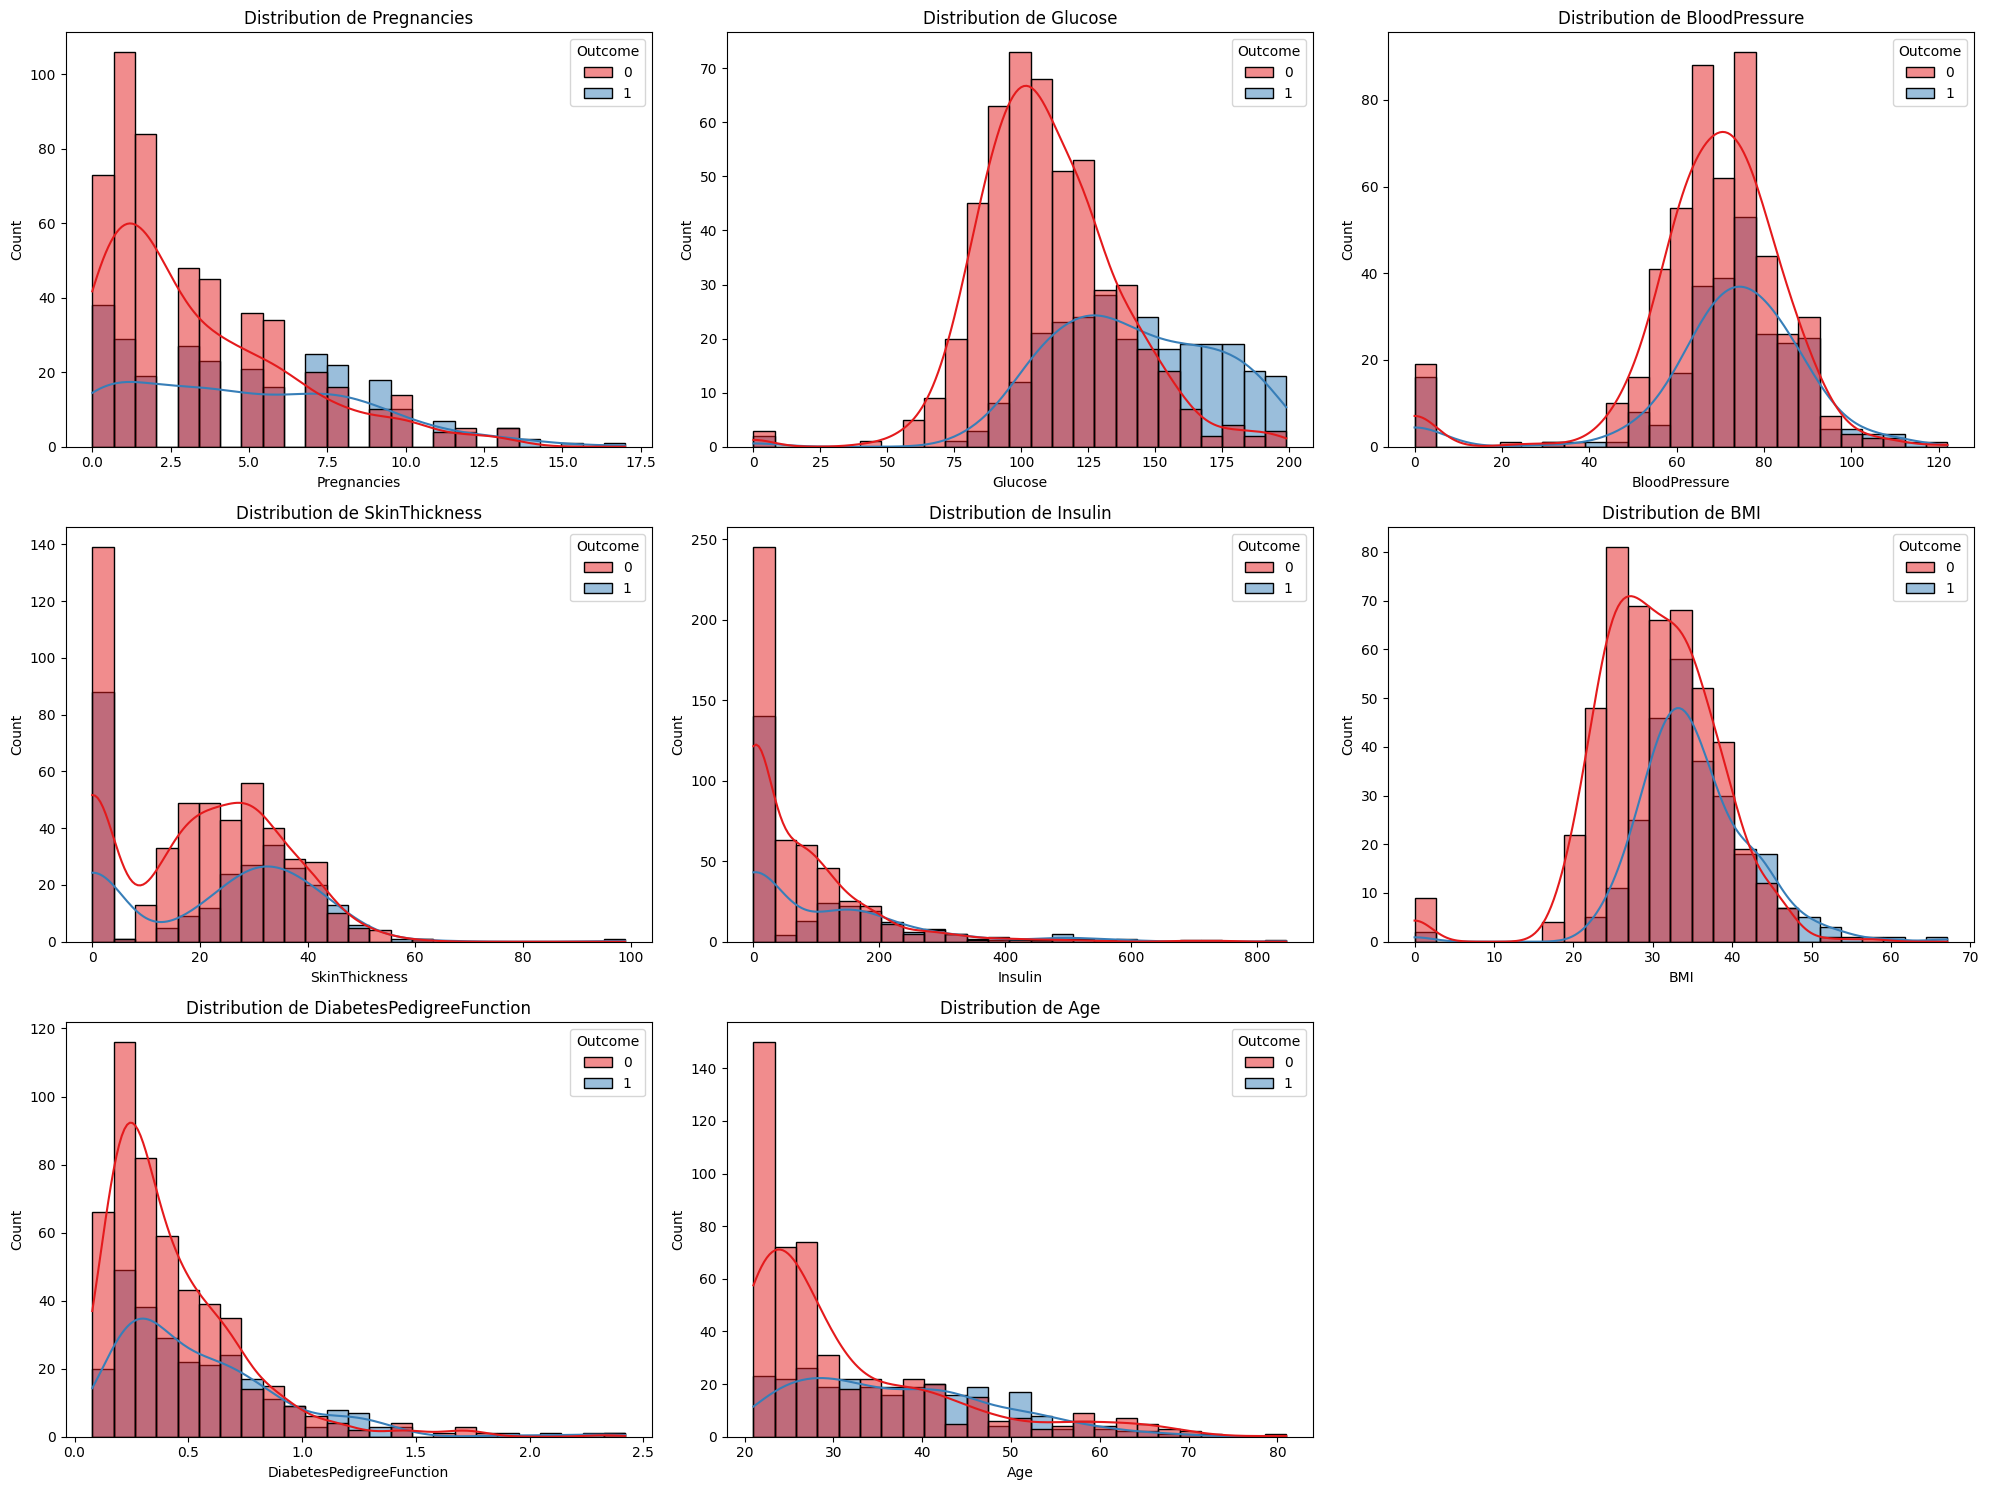

In [13]:
# Visualisation de la distribution des variables numériques
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=column, hue='Outcome', kde=True, bins=25, palette='Set1')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

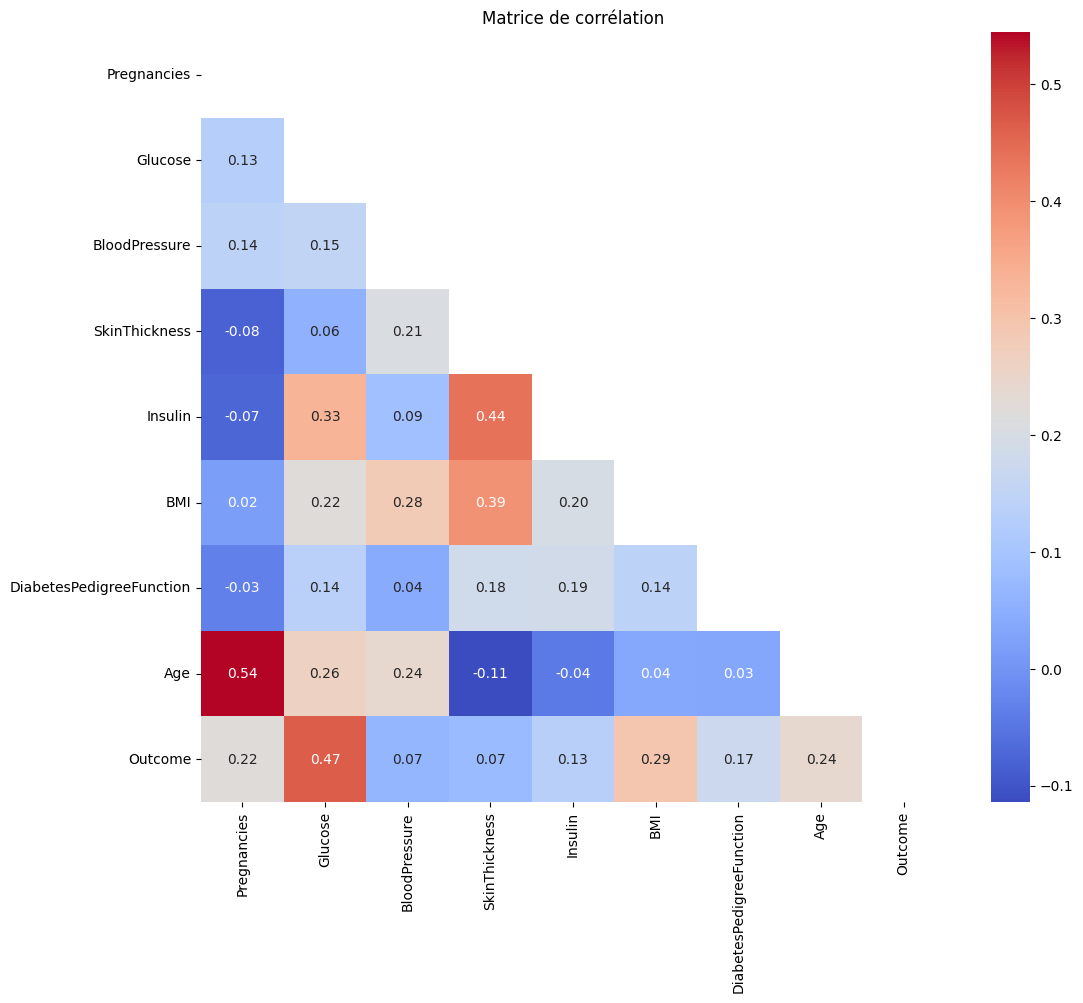

Corrélations avec la variable cible (Outcome):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [18]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Matrice de corrélation')
plt.show()

# Afficher les corrélations avec la variable cible
print("Corrélations avec la variable cible (Outcome):")
print(corr_matrix['Outcome'].sort_values(ascending=False))

In [19]:
# Création d'une copie propre du dataset
df_clean = df.copy()

# Remplacer les zéros par NaN là où c'est physiologiquement impossible
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df_clean[column] = df_clean[column].replace(0, np.nan)

# Imputation des valeurs manquantes par la médiane
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = df_clean[column].median()
    df_clean[column] = df_clean[column].fillna(median_value)

# Vérification que toutes les valeurs manquantes ont été traitées
print("Nombre de valeurs manquantes après imputation:")
print(df_clean.isnull().sum())

# Comparer les statistiques avant/après imputation
print("\nStatistiques après imputation:")
print(df_clean.describe())

Nombre de valeurs manquantes après imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques après imputation:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000